<p style="font-family: Arial; font-size:3.60em;color:purple; font-style:bold"><br>
Chapter 2: Supervised learning
</p><br>



Supervised Machine Learning Algorithms

 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
The Wisconsin Breast Cancer dataset

The Wisconsin Breast Cancer dataset (cancer , for short), which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

In [102]:
#Instaling the mglearn
!pip install mglearn

In [21]:
#Importing
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import mglearn as mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [83]:
#loading the data
cancer = load_breast_cancer()
print(cancer.keys()) #It is a bunch. They behave as a dictionary. To call the function use bunch.key instead of bunch['key'] 
print(cancer.data.shape) #Contains 569 points with 30 features

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


In [84]:
#Exploring the type of data
print('data type', type(cancer.data))
print('target type', type(cancer.target))
print('frame type', type(cancer.frame))
print('target_names type', type(cancer.target_names))
print('DESCR type', type(cancer.DESCR))
print('feature_names type', type(cancer.feature_names))
print('filename type', type(cancer.filename))

data type <class 'numpy.ndarray'>
target type <class 'numpy.ndarray'>
frame type <class 'NoneType'>
target_names type <class 'numpy.ndarray'>
DESCR type <class 'str'>
feature_names type <class 'numpy.ndarray'>
filename type <class 'str'>


In [85]:
#Exploring the data of the ndarray
print("data:", cancer['data'][10:]) #the measurements 
print("target:", cancer['target'][10:]) #the 2 classes measurements "0:malignant", "1:benign"
print("target_names", cancer['target_names']) #the 2 classes "malignant", "benign"
print("feature_names", cancer['feature_names']) #the 30 features types

#another way of looking the data is

#print("Feature names:\n", cancer.feature_names)

#Exploring the str data
print('Description:', cancer.DESCR)
print('filename:', cancer.filename)

data: [[1.602e+01 2.324e+01 1.027e+02 ... 9.975e-02 2.948e-01 8.452e-02]
 [1.578e+01 1.789e+01 1.036e+02 ... 1.810e-01 3.792e-01 1.048e-01]
 [1.917e+01 2.480e+01 1.324e+02 ... 1.767e-01 3.176e-01 1.023e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
target: [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1
 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 

In [86]:
#Counting how many measurements are malignant or benign 

print("Sample counts per class:\n",
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


k-Neighbors algorithm: is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

In [87]:
#Splitting the dataset in traing data and test data

X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('Training data shape:',X_train.shape, 'Test data shape', X_test.shape)

Training data shape: (426, 30) Test data shape (143, 30)


In [88]:
#setting up the parameters of the algorithm. Utilizing the 3 closest neighbors
clf = KNeighborsClassifier(n_neighbors=3)

In [89]:
#fitting the classifier to the training dataset
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [90]:
#Predicting the classifier by using the test data
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [91]:
#Evaluating the classifier to get the accuracy of the algorithm
clf.score(X_test, y_test)

0.9230769230769231

In [95]:
##Creating the model by using different number of neighbors###

#loading the data
cancer = load_breast_cancer()

#Splitting the dataset in traing data and test data. Considering the random state 66

X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)
print('Training data shape:',X_train.shape, 'Test data shape', X_test.shape)


Training data shape: (426, 30) Test data shape (143, 30)


In [96]:
#Creating an empty list for recording the accuracy of the model
training_accuracy = []
test_accuracy = []

# building the model
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train)) #saving the accuracy in the training_accuracy list
    test_accuracy.append(clf.score(X_test, y_test)) #saving the accuracy in the test_accuracy list
    
print('training accuracy list:', training_accuracy)
print('test accuray list:', test_accuracy)

training accuracy list: [1.0, 0.9765258215962441, 0.9577464788732394, 0.9553990610328639, 0.9483568075117371, 0.9460093896713615, 0.9436619718309859, 0.9413145539906104, 0.9342723004694836, 0.9389671361502347]
test accuray list: [0.9020979020979021, 0.8881118881118881, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9300699300699301, 0.9300699300699301, 0.916083916083916, 0.916083916083916]


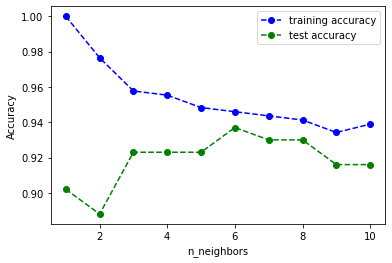

In [100]:
#Plotting the accuracy of the model according to the number of neighbors

plt.plot(neighbors_settings, training_accuracy, 'bo--', label="training accuracy")
plt.plot(neighbors_settings, test_accuracy,'go--', label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

Considering fewer neighbors corresponds to a more complex model, and considering more neighbors the accuracy of the training set drops. Considering 1 neighbor the training accuracy is perfect 1.00. 

The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. 

The best performance is somewhere in the middle, using around six neighbors.

 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
k-neighbors regression
    
There is also a regression variant of the k-nearest neighbors algorithm. 

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

#Making the prediction
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [108]:
#which for regressors returns the R score
#The R score, also known as the coefficient of determination, 
#is a measure of goodness of a prediction for a regression model, and yields a score that’s usually between 0 and 1.
#A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses

reg.score(X_test, y_test)

0.8344172446249605

 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Strengths, weaknesses, and parameters
    
In principle, there are two important parameters to the KNeighbors classifier:
the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. 

By default, Euclidean distance is used, which works well in many settings.
    
    
One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques.
    
Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. 
    
When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

 <p style="font-family: Arial; font-size:1.40em; font-style:bold"><br>   
So, while the k-nearest neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.

 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Linear regression (aka ordinary least squares)
    
It is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that
minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number
of samples. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=60) #Defining the dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #Splitting the dataset in training and test dataset

In [11]:
lr = LinearRegression() #defining the function

In [12]:
lr.fit(X_train, y_train) #fitting the function with the training dataset

LinearRegression()

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

In [14]:
print("linear regression coefficient:", lr.coef_) #he coef_ attribute is a NumPy array with one entry per input feature. 
print("linear regression intercept:", lr.intercept_) #the intercept_ attribute is always a single float number

linear regression coefficient: [0.39390555]
linear regression intercept: -0.031804343026759746


In [15]:
lr.score(X_train, y_train) #Checking the score with the training dataset

0.6700890315075756

In [16]:
lr.score(X_test, y_test) #Checking the score with the test dataset

0.65933685968637

An R of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.

For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. 

The discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. 

 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Ridge regression
    
Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on
the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little
effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting.

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified
by the user, using the alpha parameter. In the previous example, we used the de-fault parameter alpha=1.0 . There is no reason why this will give us the best trade-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization.